In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from itertools import count

# Input wine data from the following URL:
wine = pd.read_csv('Wine.csv')


In [38]:
X=dataset.iloc[:,2:16]

In [53]:
y=dataset.iloc[:,1]

In [54]:
X.columns = [  'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

In [55]:
X

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035
1,12.29,3.17,2.21,18.0,88,2.85,2.99,0.45,2.81,2.30,1.42,2.83,406
2,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407
3,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795
4,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886
173,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615
174,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495
175,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607


In [56]:
y.columns=['Name']

In [65]:
y.tail()

172    2
173    3
174    2
175    2
176    3
Name: 1, dtype: int64

In [66]:
dummy_X = np.array(X[[  'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]])
dummy_y = np.array(y)

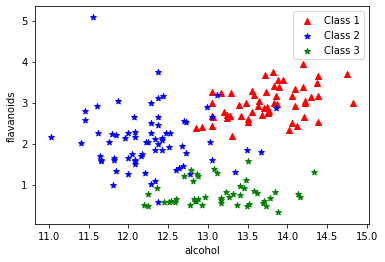

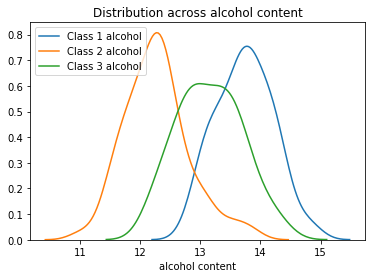

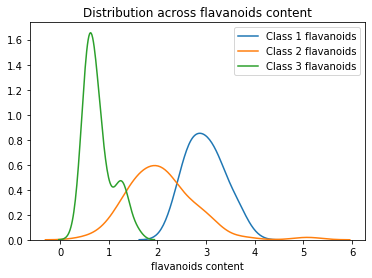

In [74]:
#plotting according to alcohol and flavanoida content
plt.scatter(dummy_X[dummy_y == 1, 0],dummy_X[dummy_y == 1, 6],label='Class 1',marker='^',color='red')
plt.scatter(dummy_X[dummy_y == 2, 0],dummy_X[dummy_y == 2, 6],label='Class 2',marker='*',color='blue')
plt.scatter(dummy_X[dummy_y == 3, 0],dummy_X[dummy_y == 3, 6],label='Class 3',marker='*',color='green')
plt.xlabel('alcohol')
plt.ylabel('flavanoids')
plt.legend(loc='upper right')
plt.show()


sns.kdeplot(dummy_X[dummy_y == 1,0], label='Class 1 alcohol')
sns.kdeplot(dummy_X[dummy_y == 2,0], label='Class 2 alcohol')
sns.kdeplot(dummy_X[dummy_y == 3,0], label='Class 3 alcohol')
plt.title('Distribution across alcohol content')
plt.xlabel('alcohol content')
plt.show()


sns.kdeplot(dummy_X[dummy_y == 1,6], label='Class 1 flavanoids')
sns.kdeplot(dummy_X[dummy_y == 2,6], label='Class 2 flavanoids')
sns.kdeplot(dummy_X[dummy_y == 3,6], label='Class 3 flavanoids')
plt.title('Distribution across flavanoids content')
plt.xlabel('flavanoids content')
plt.show()

In [79]:

# demonstrate data standardization with sklearn
from sklearn.preprocessing import StandardScaler
# load data
data = dummy_X
# create scaler
scaler = StandardScaler()
# fit and transform in one step
data = scaler.fit_transform(data)

In [81]:
data

array([[ 0.51620227,  1.344009  , -0.89739756, ..., -0.20562693,
         0.56279557,  0.92328075],
       [-0.87247921,  0.7437302 , -0.56929237, ...,  2.02644896,
         0.32101204, -1.07994681],
       [-2.43474589, -0.74352772, -0.6057485 , ...,  3.29566859,
         0.37790228, -1.07676203],
       ...,
       [-1.03366546, -0.65393387, -0.20473105, ...,  1.63255322,
        -0.48967393, -0.79650126],
       [-1.52962313,  0.30472033,  2.01909302, ...,  1.19489128,
        -0.14833247, -0.43980573],
       [-0.59970249, -0.98543112, -0.42346784, ..., -0.90588604,
        -1.55636599, -0.30286013]])

In [87]:
# encode class values as integers
from keras.utils import np_utilsfrom keras.utils import np_utilsfrom keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(dummy_y)
encoded_Y = encoder.transform(dummy_y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

Using TensorFlow backend.


In [94]:
dummy_X.shape


(177, 13)

In [95]:
dummy_y.shape

(177, 3)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummy_X,dummy_y, test_size = 0.2, random_state = 0)

In [111]:
model.fit(X_train, y_train, batch_size = 10, nb_epoch = 50)

Epoch 1/50
141/141 [==============================] - 0s 798us/step - loss: 0.1999 - accuracy: 0.9504
Epoch 2/50
141/141 [==============================] - 0s 395us/step - loss: 0.2268 - accuracy: 0.9291
Epoch 3/50
 10/141 [=>............................] - ETA: 0s - loss: 0.1628 - accuracy: 1.0000

/home/ayush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


141/141 [==============================] - 0s 721us/step - loss: 0.2055 - accuracy: 0.9362
Epoch 4/50
141/141 [==============================] - 0s 374us/step - loss: 0.1934 - accuracy: 0.9291
Epoch 5/50
141/141 [==============================] - 0s 324us/step - loss: 0.1852 - accuracy: 0.9362
Epoch 6/50
141/141 [==============================] - 0s 308us/step - loss: 0.1795 - accuracy: 0.9291
Epoch 7/50
141/141 [==============================] - 0s 264us/step - loss: 0.2175 - accuracy: 0.9362
Epoch 8/50
141/141 [==============================] - 0s 607us/step - loss: 0.2063 - accuracy: 0.9291
Epoch 9/50
141/141 [==============================] - 0s 359us/step - loss: 0.1829 - accuracy: 0.9291
Epoch 10/50
141/141 [==============================] - 0s 470us/step - loss: 0.2249 - accuracy: 0.9220
Epoch 11/50
141/141 [==============================] - 0s 470us/step - loss: 0.2357 - accuracy: 0.9078
Epoch 12/50
141/141 [==============================] - 0s 438us/step - loss: 0.1927 - accur

In [ ]:
params, scores = [],[]
for a in range(-5,6):
    mlp = MLPClassifier(solver='lbfgs'
                    , activation = 'relu'
                    , alpha=10**a
                    , hidden_layer_sizes=(50,25,10,5)
                    , random_state=1)
    mlp.fit(X_train, y_train)
    yPredMLP = mlp.predict(X_test)
    score = accuracy_score(y_test,yPredMLP)
    params.append(mlp.alpha)
    scores.append(score)

In [119]:
yPred = model.predict(X_test)

In [120]:
yPred=(yPred == yPred.max(axis=1)[:,None]).astype(int)

In [122]:
score = accuracy_score(y_test,yPred)

In [123]:
score

0.9444444444444444

In [130]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(
    y_test.argmax(axis=1), yPred.argmax(axis=1))

array([[ 8,  1,  0],
       [ 1, 14,  0],
       [ 0,  0, 12]])